#### Importing Standard Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Reading the Data

In [2]:
df = pd.read_csv('vehicle-1.csv')
data = df.copy()
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

#### Name of the Variables and Shape of the Data

In [3]:
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [4]:
df.shape

(846, 19)

## Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [6]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

##### Observation
1. The Dataset consists of 19 variables with 846 rows
2. Except for class column which is a Categorical column every other column is a Numerical column
3. The Dataset has missing values for multiple columns. The columns are circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1 and skewness_about.2
4. Class column is the Target variable & should not be considered for PCA

#### Handling Categorical Column
In this case it is the Target column i.e. Class Column

In [7]:
TARGET = "class"
df[TARGET].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df[TARGET] = labelencoder.fit_transform(df[TARGET])
df[TARGET].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

##### Observation: After label encoding we identify 0 = bus, 1 = car & 2 = van

#### Handling Missing Values
Since the number of missing values in not too large. We will replace the missing values with the MEDIAN of the column

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=1)
#fill missing values with mean column values
transformed_values = imputer.fit_transform(df)
column = df.columns
df = pd.DataFrame(transformed_values, columns = column )

In [10]:
print("Data after treating missing value : ")
df.isnull().sum()

Data after treating missing value : 


compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [11]:
df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          1.0    1.00     2.0

##### Observations
- Since for majority of the columns the mean and median (50%) are almost similar, it signifies that they are normally distributed and their are no outliers present in these variables.
- Few columns like scatter_ratio, scaled_variance & scaled_variance.1 indicates presence of outliers (to be treated later) hence there will be some skewness present in these variables. We will evaluate it later in detail.

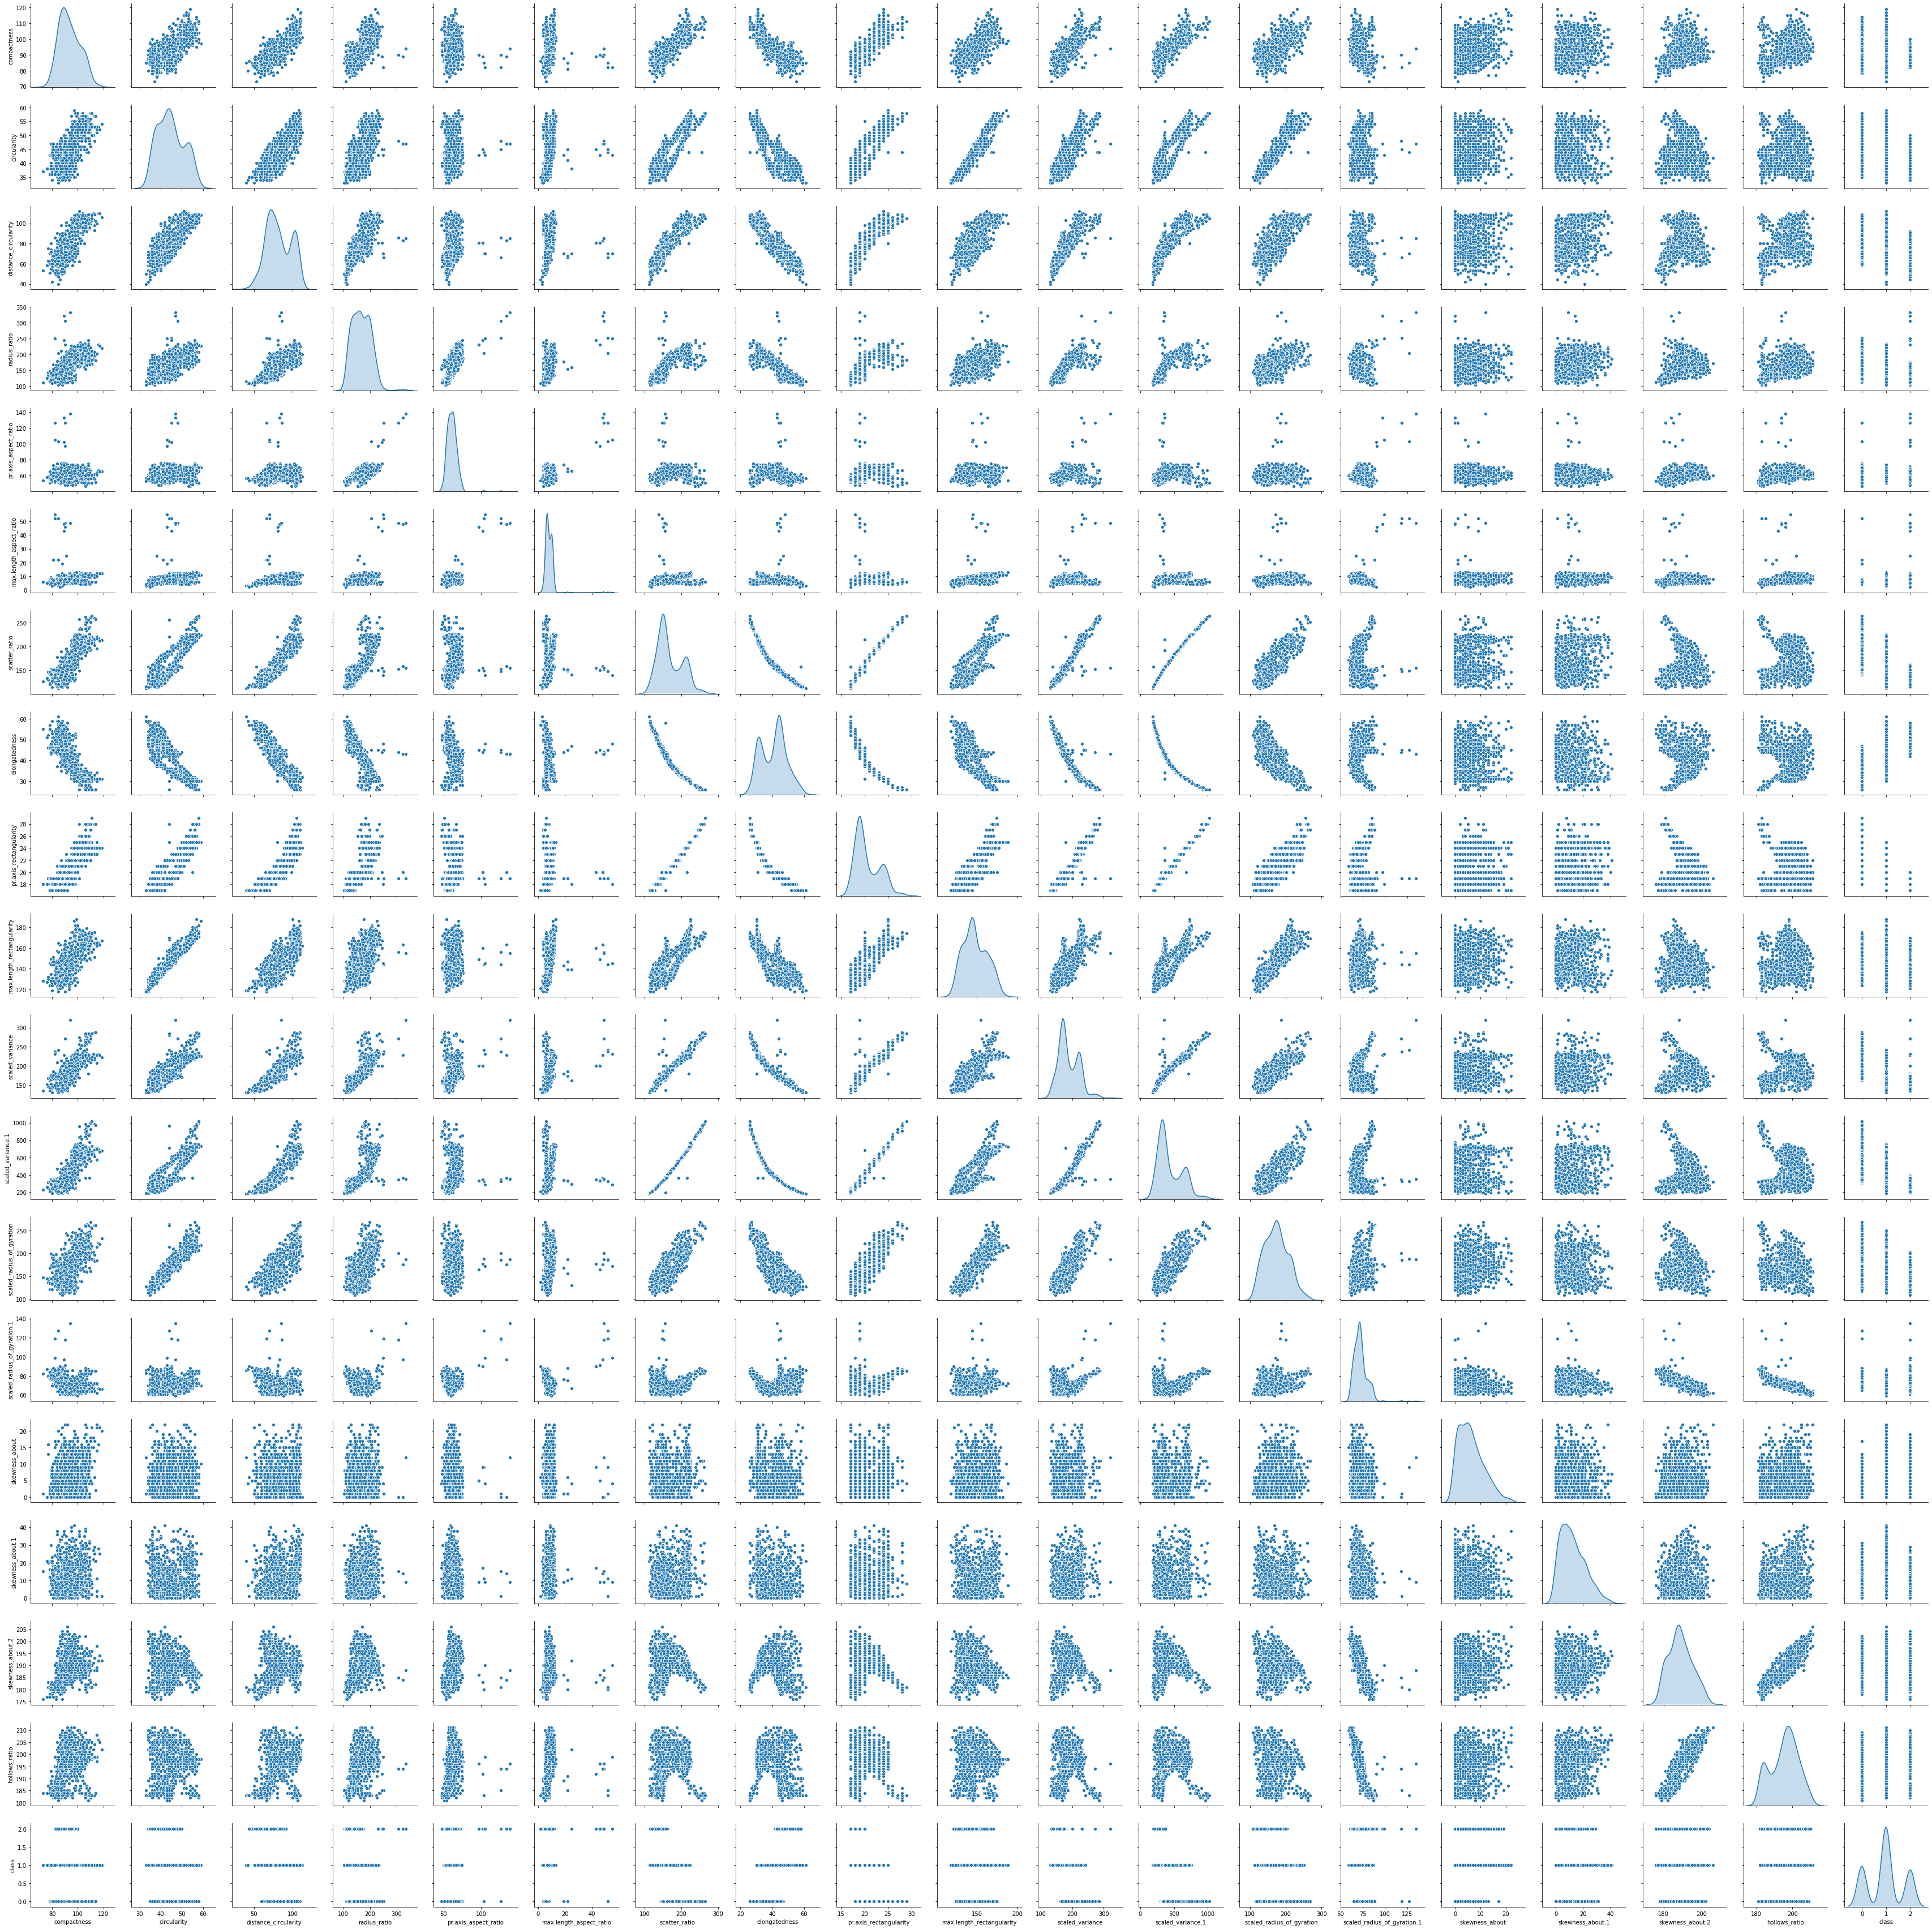

In [12]:
sns.pairplot(df, diag_kind='kde')

##### Inferences
- We can see that there are many features which are highly correlated (positively as well as negatively) among each other. The columns compactness, circularity, distance_circularity, radius_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration are highly correlated.
- Columns pr.axis_aspect_ratio and max.length_aspect_ratio do not have correlation with majority of other columns.
- Columns scaled_radius_of_gyration.1 has high negative correlation with skewness_about.2 and hollows_ratio columns. It has very less corelation with other columns.
- Column skewness_about.2 is positively correlated with the hollows_ratio column.
- We also notice presence of outliers in some dimensions as the points seems far from othe cluster of points.
- To summarize, there are lot of dimensions which seems correlated to each other visually and we will need to perform Correlation analysis to make more inferences about the data.

### Numerical Variables

In [13]:
#Method to show Distribution & Box plot for the variable along with skewness
def showPlots(df, col):
    fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
    fig.set_size_inches(10,2)
    sns.distplot(df[col],ax=ax1)
    ax1.set_title("Distribution Plot")
    sns.boxplot(df[col],ax=ax2)
    ax2.set_title("Box Plot")
    print(df[col].skew())

0.38127063263996497


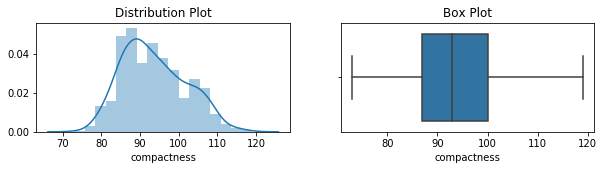

In [14]:
showPlots(df, 'compactness')

##### Observation: compactness column seems normally distributed.

0.2649279874901165


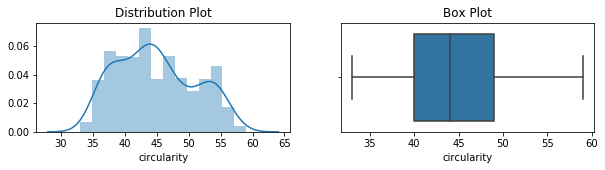

In [15]:
showPlots(df, 'circularity')

##### Observation: circularity column seems normally distributed with multiple guassian's.

0.10871801180935975


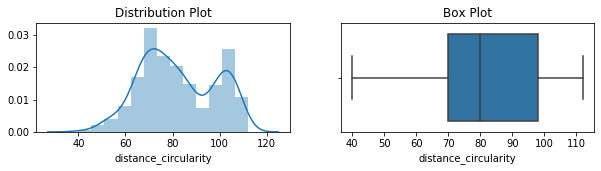

In [16]:
showPlots(df, 'distance_circularity')

##### Observation: distance_circularity column seems normally distributed with multiple guassian's.

0.3975716412698015


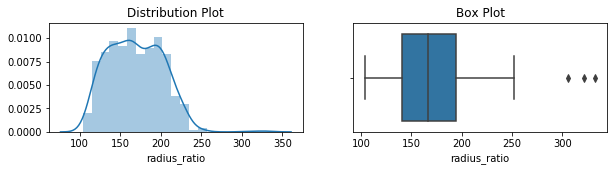

In [17]:
showPlots(df, 'radius_ratio')

##### Observation: radius_ratio column is right skewed with outliers.

3.8353916077858434


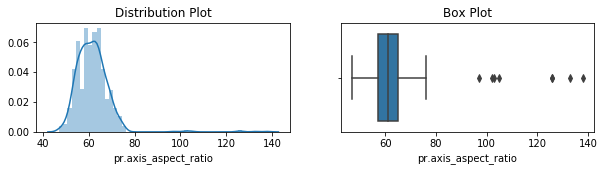

In [18]:
showPlots(df, 'pr.axis_aspect_ratio')

##### Observation: pr.axis_aspect_ratio column is right skewed with outliers.

6.7783936191089476


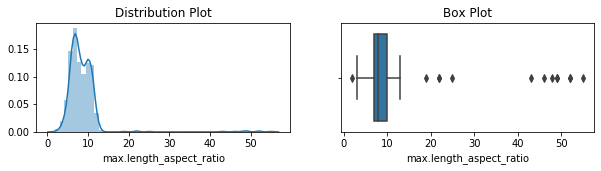

In [19]:
showPlots(df, 'max.length_aspect_ratio')

##### Observation: max.length_aspect_ratio column is right skewed with outliers.

0.6087097328672928


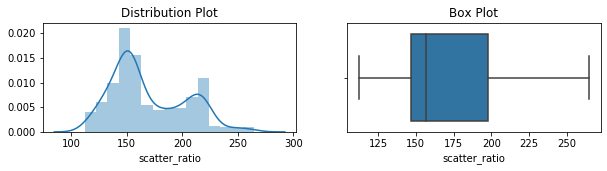

In [20]:
showPlots(df, 'scatter_ratio')

##### Observation: scatter_ratio column seems normally distributed with multiple guassian's.

0.046951051315584164


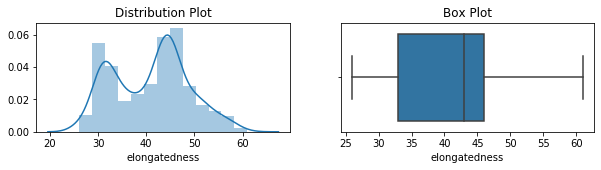

In [21]:
showPlots(df, 'elongatedness')

##### Observations: elongatedness column seems normally distributed with multiple guassian's.

0.7744056757899445


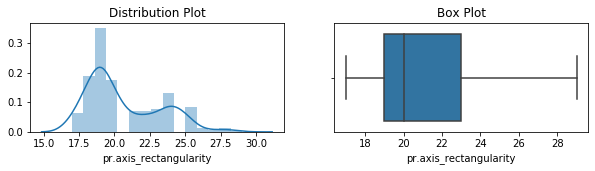

In [22]:
showPlots(df, 'pr.axis_rectangularity')

##### Observations: pr.axis_rectangularity column seems normally distributed with multiple guassian's.

0.2563591641353724


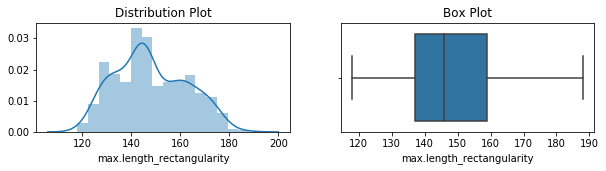

In [23]:
showPlots(df, 'max.length_rectangularity')

##### Observations: max.length_rectangularity column seems normally distributed.

0.6555976294220067


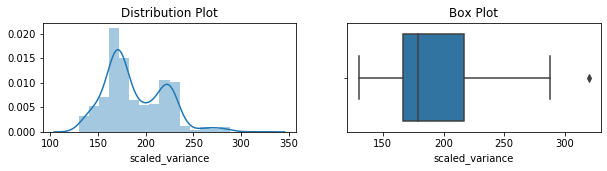

In [24]:
showPlots(df, 'scaled_variance')

##### Observations: scaled_variance column seems normally distributed with multiple guassian's.There is a outlier present.

0.8453454281630146


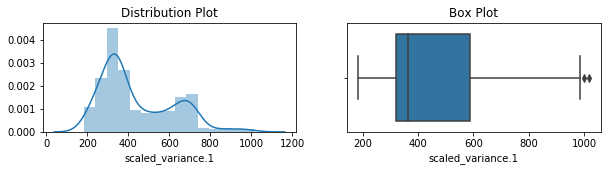

In [25]:
showPlots(df, 'scaled_variance.1')

##### Observations: scaled_variance.1 column is lightly right skewed with outliers.

0.27990964799345835


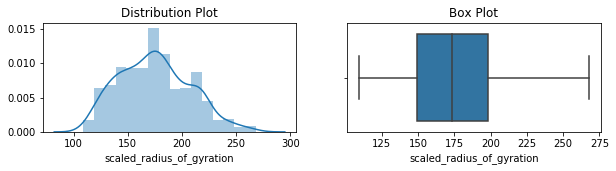

In [26]:
showPlots(df, 'scaled_radius_of_gyration')

##### Observations: scaled_radius_of_gyration column seems normally distributed.

2.0899787533912066


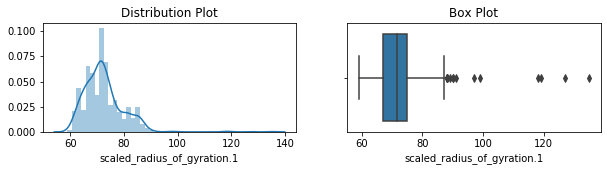

In [27]:
showPlots(df, 'scaled_radius_of_gyration.1')

##### Observations: scaled_radius_of_gyration.1 column is highly right skewed with outliers. 

0.7808132397211246


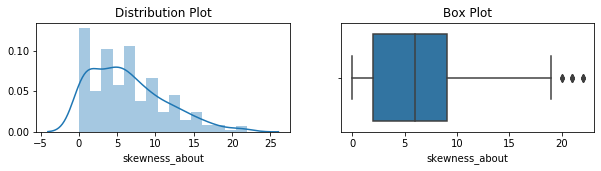

In [28]:
showPlots(df, 'skewness_about')

##### Observations: skewness_about column is moderately right skewed with outliers. 

0.6890143067342678


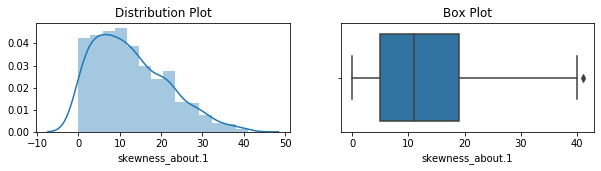

In [29]:
showPlots(df, 'skewness_about.1')

##### Observations: skewness_about.1 column is lighty right skewed with an outlier. 

0.24998506992542593


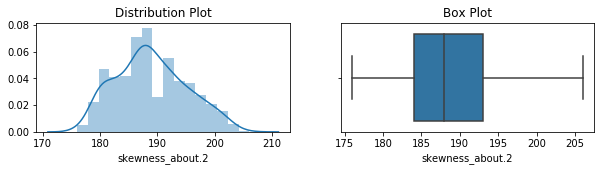

In [30]:
showPlots(df, 'skewness_about.2')

##### Observations: skewness_about.2 column seems normally distributed.

-0.22634128032982512


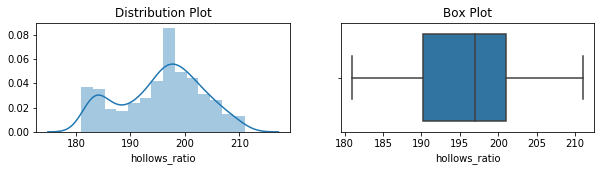

In [31]:
showPlots(df, 'hollows_ratio')

##### Observations: hollows_ratio column seems normally distributed with multiple guassian's.

#### Let see the summary of the data to further understand the numerical variables.

##### Observations:
From the above graphs, it can be seen that the columns radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance, scaled_variance.1, scaled_radius_of_gyration.1, skewness_about, skewness_about.1 have outliers. Therefore, we will treat outliers of these columns before proceeding further.

#### Outliers Treatment

In [32]:
#We will handle the outliers using IQR for all the columns
from scipy.stats import iqr

def handleOutliers(odf):
    Q1 = odf.quantile(0.25)
    Q3 = odf.quantile(0.75)
    IQR = Q3 - Q1
    cleandf = odf[~((odf < (Q1 - 1.5 * IQR)) | (odf > (Q3 + 1.5 * IQR))).any(axis=1)]
    print(cleandf.shape)
    return cleandf

In [33]:
df = handleOutliers(df)

(813, 19)


#### Target Column Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024CB0768348>]],
      dtype=object)

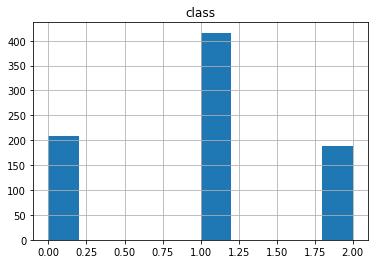

In [34]:
df.hist(column=TARGET)

##### Observation
- The columns "class" has categorical data having 3 different values of 0 for bus, 1 for car & 2 for van.
- The graph shows the distribution of the data across the three classes. Class type car i.e 1 takes up 50% of the data within the Vehicle Data Set. While van and bus have near about similar counts within the data set.

#### Correlation Comparison

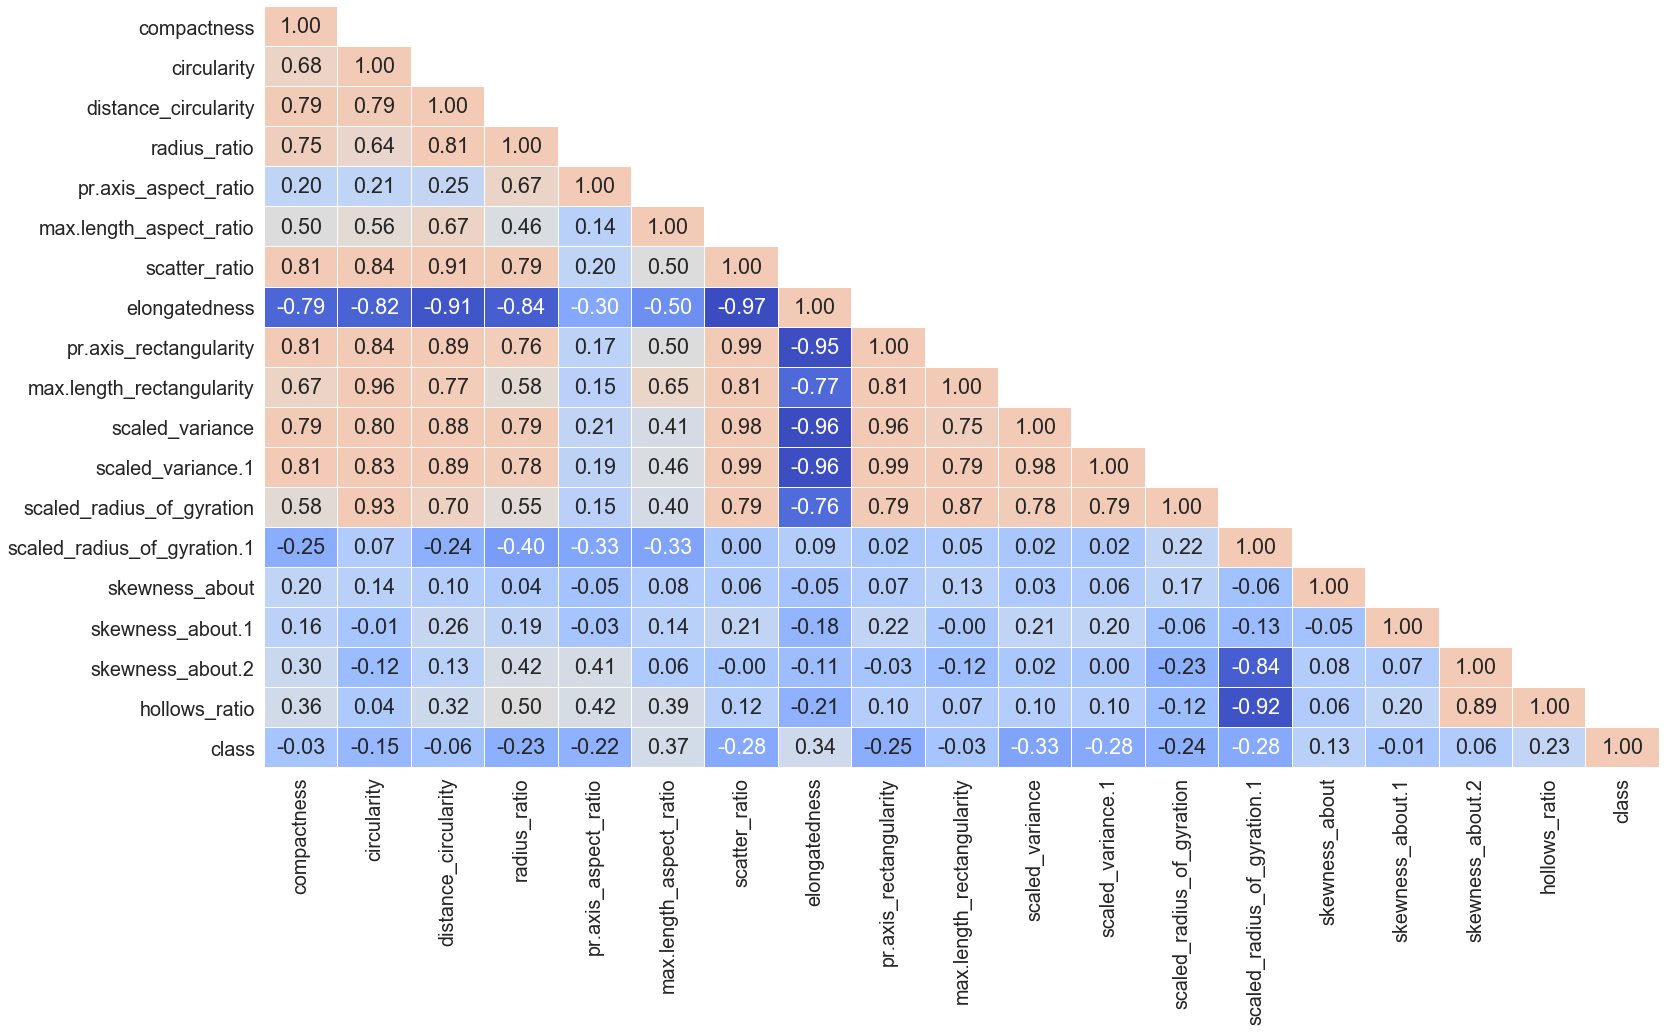

In [35]:
corr = df.corr()
# select only the lower triangle of the correlation matrix
lower_triangle = np.tril(corr) 
# to mask the upper triangle in the following heatmap
mask = lower_triangle == 0  

plt.figure(figsize = (25,14))
sns.set(font_scale=1.8)
# Setting it to white so that we do not see the grid lines
sns.set_style(style = 'white')  
sns.heatmap(lower_triangle, center=0.5, cmap= 'coolwarm', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, mask = mask, linecolor='white', vmax=.8, fmt='.2f',linewidths=0.01)

#Logic to manage the known issue with Matplotlib version 3.1.11 w.r.t. Heat Map
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()
sns.set(font_scale=1)

#### Observations
##### Strong or Very High Correlations ( > 0.9 )
Few important observations are
- circularity is correlated with max.length_rectangularity & scaled_radius_of_gyration
- distance_circularity is positively correlated with scatter_ratio & negtively with elongatedness
- scatter_ratio is correlated with scaled_variance.1, scaled_variance, pr.axis_rectangularity & negtively with elongatedness
- elongatedness is negatively correlated to scaled_variance.1, scaled_variance & pr.axis_rectangularity
- pr.axis_rectangularity is correlated with scaled_variance.1 & scaled_variance
- scaled_variance is correlated with scaled_variance.1
- scaled_radius_of_gyration.1 is negatively correlated with hollows_ratio & skewness_about.2

##### High Correlations ( > 0.7 till 0.9 )
Few important observations are
- The columns compactness, circularity, distance_circularity, radius_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1 & scaled_radius_of_gyration are highly correlated among each other.
- skewness_about.2 is highly correlated with hollows_ratio

##### Low or No Correlations ( < 0.5 )
Few important observations are
- pr.axis_aspect_ratio, max_length_aspect_ratio & scaled_radius_of_gyration seems to have very little correlation with all the other columns
- scaled_radius_of_gyration & scaled_radius_of_gyration.1 seems to have almost no correlation
- scaled_radius_of_gyration.1 & skewness_about seems to have almost no correlation
- skewness_about, skewness_about.1 & skewness_about.2 are not correlated to each other.

### Important Insight
- The Pair plot as well as the Correlation Comparison helps us to infer that there are considerable number of columns that are strongly correlated to each other. So, either they need to dropped of treated carefully before we go for model building. 
- Our objective is to recognize whether the class is a van or bus or car based on some input features hence we need to ensure that there is little or no multicollinearity between the features. If our dataset has perfectly positive or negative attributes as can be obseverd from our correlation analysis, there is a high chance that the performance of the model will be impacted by Multicollinearity eventually leading to skewed or misleading results.

#### Resolve Multicollinearity
We are only considering a couple of most popular approaches used for resolving multicollinearity from the dataset 
##### Approach 1
- If two features are highly correlated then there is no point using both features & we can drop one feature. Based on above observations we can decide to get rid of those columns whose correlation is +-0.9 or above. There are 8 such columns:
    - max.length_rectangularity
    - scaled_radius_of_gyration
    - skewness_about.2
    - scatter_ratio
    - elongatedness
    - pr.axis_rectangularity
    - scaled_variance
    - scaled_variance.1
   
##### Approach 2
- As we observed in our analysis that there are more than 50% attributes that are highly correlated with each other. Dropping or eliminating highly correlated columns could result in loss of information and hence we could prefer using the popular dimension reduction algorithm such as Principal Component Analysis (PCA)

##### We will be implementing both the approaches and finally evaluate them together. 

#### Storing the processed dataset

In [36]:
processed_df = df

## Model Building

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Common Methods

#### Model Execution Functions

In [38]:
SPLIT_VALUE = 0.30
SEED = 1501

# Function to split Target Variable from data
def SplitData(d):
    #Set of Independent Variables
    X=d.drop(TARGET, axis=1)
    #Dependent Variable
    y=d[TARGET]
    return X,y
    
# Function to Scale data
def ScaleData(X):
    scaler = preprocessing.StandardScaler()
    return scaler.fit_transform(X)

# Function to split data into training & test set
def SplitTrainTestData(X, y):    
    Xtrain, Xtest, ytrain, ytest = train_test_split (X, y, test_size=SPLIT_VALUE, stratify=y, random_state=SEED)
    print("Training Data Shape: {0}".format(Xtrain.shape))
    print("Testing Data Shape: {0}".format(Xtest.shape))
    return Xtrain, Xtest, ytrain, ytest

# Function to fit the model
def ModelFit (model, Xtr, ytr):
    fit = model.fit(Xtr, ytr)
    print(fit)
    return model

# Function to predict from model
def ModelPredict (model, Xtt, ytt):
    pred = model.predict(Xtt)
    acc_scr = accuracy_score(ytt, pred)
    return pred, acc_scr

# Function to print the Results of the model
def PrintResults(model, pred, Xtr, Xtt, ytr, ytt):  
    x = PrettyTable()
    x.field_names = ["Metrics", "Results"]
    x.add_row(["Classification Report", classification_report(ytt, pred)])    
    x.add_row(["Accuracy Score", accuracy_score(ytt, pred)])
    x.add_row(["",""])
    x.add_row(["Confusion Matrix", confusion_matrix(ytt, pred)])
    x.add_row(["",""])
    x.add_row(["Training Data Score", model.score(Xtr, ytr)])
    x.add_row(["",""])
    x.add_row(["Testing Data Score", model.score(Xtt, ytt)])
    print(x)

#### Hyper Parameter Tuning Function

In [39]:
def SVCTuneHyperParams(svc, Xtr, ytr):
    svc = SVC()
    Cs = [0.1, 1, 10, 100]
    gammas = [0.01, 0.1, 1, 10]
    kernel = ['linear', 'rbf', 'poly']
    param = dict(kernel = kernel, C = Cs, gamma = gammas)
    gs = GridSearchCV(svc, param, cv=3, scoring='accuracy', n_jobs = -1)
    gs.fit(Xtr, ytr)

    svc_bestScore = gs.best_score_
    svc_bestParam = gs.best_params_

    #Creating new model with best Parameters and running on the data again
    k = svc_bestParam['kernel']
    C = svc_bestParam['C']
    g = svc_bestParam['gamma']
    svc = SVC(kernel = k, C=C, gamma =g, probability=True)
    svc.fit(Xtr, ytr)

    x = PrettyTable()
    x.field_names = ["Hyper Tuning", "Results"]
    x.add_row(["Best Accuracy", svc_bestScore])    
    x.add_row(["",""])
    x.add_row(["Best Parameter", svc_bestParam])
    print(x)
    return svc

#### Cross Validation Function

In [40]:
from sklearn import model_selection
SPLITS = 10

def KFoldCrossValidation (name, model, X, y, scoring):
    kfold = model_selection.KFold(n_splits=SPLITS)
    results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    print(results)
    mean, std = results.mean(), results.std()
    x = PrettyTable()
    x.field_names = ["Cross Validation", "Score Mean", "Score Standard Deviation"]
    x.add_row([name, mean, std])
    print(x)
    return mean, std

#### Model Evaluation Function

In [41]:
# A single Function to execute all the steps for Model Evaluation
def ModelEvaluation(X, y, name, model, hyperTuneFunc, scoring):   
    # Creating Training & Test Set
    Xtrain, Xtest, ytrain, ytest = SplitTrainTestData(X, y)
    
    # Standardize X Data
    Xtrain = ScaleData(Xtrain)
    Xtest = ScaleData(Xtest)
    
    # Model Training/Fitting
    model = ModelFit(model, Xtrain, ytrain)
    
    # Get Model Prediction & Accuracy Score
    pred, scr = ModelPredict(model, Xtest, ytest)
    
    # Results of model
    PrintResults(model, pred, Xtrain, Xtest, ytrain, ytest)
    
    # Perform Cross Validation
    mean, std = KFoldCrossValidation(name, model, X, y, scoring)
    
    # The code will tune the Hyper Parameter to retrieve the optimal value for the Model.
    hy_model = hyperTuneFunc(model, Xtrain, ytrain)
    
    # Get Model Prediction & Accuracy Score
    hy_pred, hy_scr = ModelPredict(hy_model, Xtest, ytest)
    
    # Results of model
    PrintResults(hy_model, hy_pred, Xtrain, Xtest, ytrain, ytest)
    
    return scr, mean, hy_scr

#### Import Libraries

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

### Approach 1 - Drop Features

In [43]:
# Dropping the highly correlated columns from dataset
df = processed_df
droppedCols = ["max.length_rectangularity", "scaled_radius_of_gyration", "skewness_about.2", 
               "scatter_ratio", "elongatedness", "pr.axis_rectangularity", "scaled_variance", "scaled_variance.1"]
df1 = df.drop(droppedCols, axis=1)

# Splitting Data - Extract Target Column
X, y = SplitData(df1)

name = "Approach 1 - Drop Features"
model = SVC(kernel='linear', probability=True)
scoring = 'accuracy'
scr_a1, scr_cv_a1, scr_a1_hy = ModelEvaluation(X, y, name, model, SVCTuneHyperParams, scoring)

Training Data Shape: (569, 10)
Testing Data Shape: (244, 10)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
+-----------------------+-------------------------------------------------------+
|        Metrics        |                        Results                        |
+-----------------------+-------------------------------------------------------+
| Classification Report |               precision    recall  f1-score   support |
|                       |                                                       |
|                       |          0.0       0.77      0.81      0.79        62 |
|                       |          1.0       0.93      0.87      0.90       125 |
|                       |          2.0       0.85      0.93      0.89        57 |
|                       |              

### Approach 2 - PCA

#### Common Methods

In [44]:
from sklearn.decomposition import PCA

# Function to perform PCA analysis based on supplied parameters
def PCAFit(X, component):
    # Standardize X Data
    X = ScaleData(X)
    
    # PCA technique implementation
    pca = PCA(n_components = component)
    pca.fit(X)
    
    # Print Results
    PrintPCAResults(pca)
    return pca, X

# Function to print the results of PCA Fit
def PrintPCAResults(m):
    x = PrettyTable()
    x.field_names = ["PCA Analysis", "Result"]
    x.add_row(["Eigen Values", m.explained_variance_])
    x.add_row(["",""])
    x.add_row(["Eigen Vectors", m.components_])
    x.add_row(["",""])
    x.add_row(["Variation Ratio", m.explained_variance_ratio_])
    print(x)
    
def PCATransform(X, component):
    #Perform PCA Fit
    pca, X = PCAFit(X, component)
    return pca.transform(X)

#### Approach 2 - Original Data

In [45]:
df = processed_df

# Splitting Original Data - Extract Target Column
X, y = SplitData(df)

name = "Approach 2 - Original Data"
model = SVC(kernel='linear', probability=True)
scoring = 'accuracy'
scr_a2, scr_cv_a2, scr_a2_hy = ModelEvaluation(X, y, name, model, SVCTuneHyperParams, scoring)

Training Data Shape: (569, 18)
Testing Data Shape: (244, 18)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
+-----------------------+-------------------------------------------------------+
|        Metrics        |                        Results                        |
+-----------------------+-------------------------------------------------------+
| Classification Report |               precision    recall  f1-score   support |
|                       |                                                       |
|                       |          0.0       0.89      0.92      0.90        62 |
|                       |          1.0       0.97      0.94      0.95       125 |
|                       |          2.0       0.93      0.96      0.95        57 |
|                       |              

#### PCA
As a start point we will perform PCA Fit considering the components are same as the number of columns in the dataset

In [46]:
df = processed_df

# Splitting Original Data - Extract Target Column
X, y = SplitData(df)

pca, X = PCAFit(df, len(df.columns) - 1)

+-----------------+---------------------------------------------------------------------+
|   PCA Analysis  |                                Result                               |
+-----------------+---------------------------------------------------------------------+
|   Eigen Values  |  [9.8298015  3.44128316 1.65599217 1.19615816 0.97616542 0.65974346 |
|                 |   0.3864265  0.29761637 0.19704424 0.10406877 0.0759178  0.06026822 |
|                 |  0.04187279 0.02920509 0.02379233 0.01812963 0.01667134 0.01011893] |
|                 |                                                                     |
|  Eigen Vectors  |  [[ 2.70691468e-01  2.84800745e-01  2.99997141e-01  2.72356336e-01  |
|                 |     9.93248898e-02  1.90714137e-01  3.10714628e-01 -3.08950949e-01  |
|                 |     3.07552412e-01  2.74880720e-01  3.03338914e-01  3.07270112e-01  |
|                 |     2.61849314e-01 -4.07378116e-02  3.54416416e-02  5.84807516e-02  |
|         

#### Principal Component Estimation

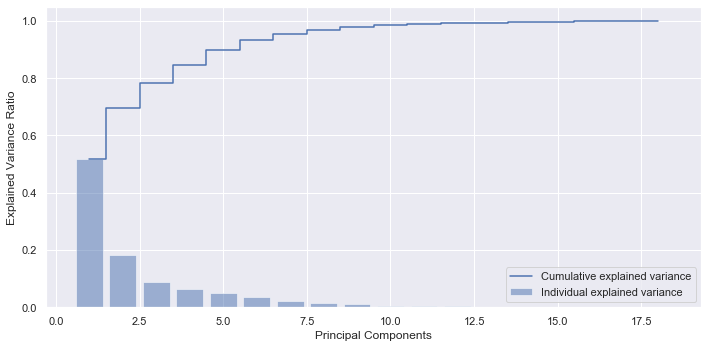

In [47]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
expVar = pca.explained_variance_ratio_
length = len(pca.explained_variance_ratio_) + 1
cExpVar = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10 , 5))
plt.bar(range(1, length), expVar, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, length), cExpVar, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#### Observation: The graph clearly shows that 7 Principal Components seems reasonable to capture more than 95% of the variance in data

#### Dimensionality Reduction 

In [48]:
df = processed_df

# Splitting Original Data - Extract Target Column
X, y = SplitData(df)

pcadf = PCATransform(X, 7)

+-----------------+-----------------------------------------------------------------------------+
|   PCA Analysis  |                                    Result                                   |
+-----------------+-----------------------------------------------------------------------------+
|   Eigen Values  |      [9.7929757  3.37710644 1.20873054 1.1365956  0.89628686 0.65829313     |
|                 |                                  0.32305653]                                |
|                 |                                                                             |
|  Eigen Vectors  |  [[ 0.27225105  0.28537005  0.30148623  0.27259451  0.09857976  0.19475579  |
|                 |     0.31051844 -0.30843834  0.30754849  0.27630107  0.30274811  0.30704063  |
|                 |     0.26152049 -0.04363236  0.0367057   0.05885041  0.03483739  0.08281362] |
|                 |   [-0.08972848  0.13317394 -0.04402596 -0.20423223 -0.25913686 -0.09457563  |
|                 | 

#### Pair Plot
Showing the pair plot of the PCA Tranform Data with only 7 Principal Components

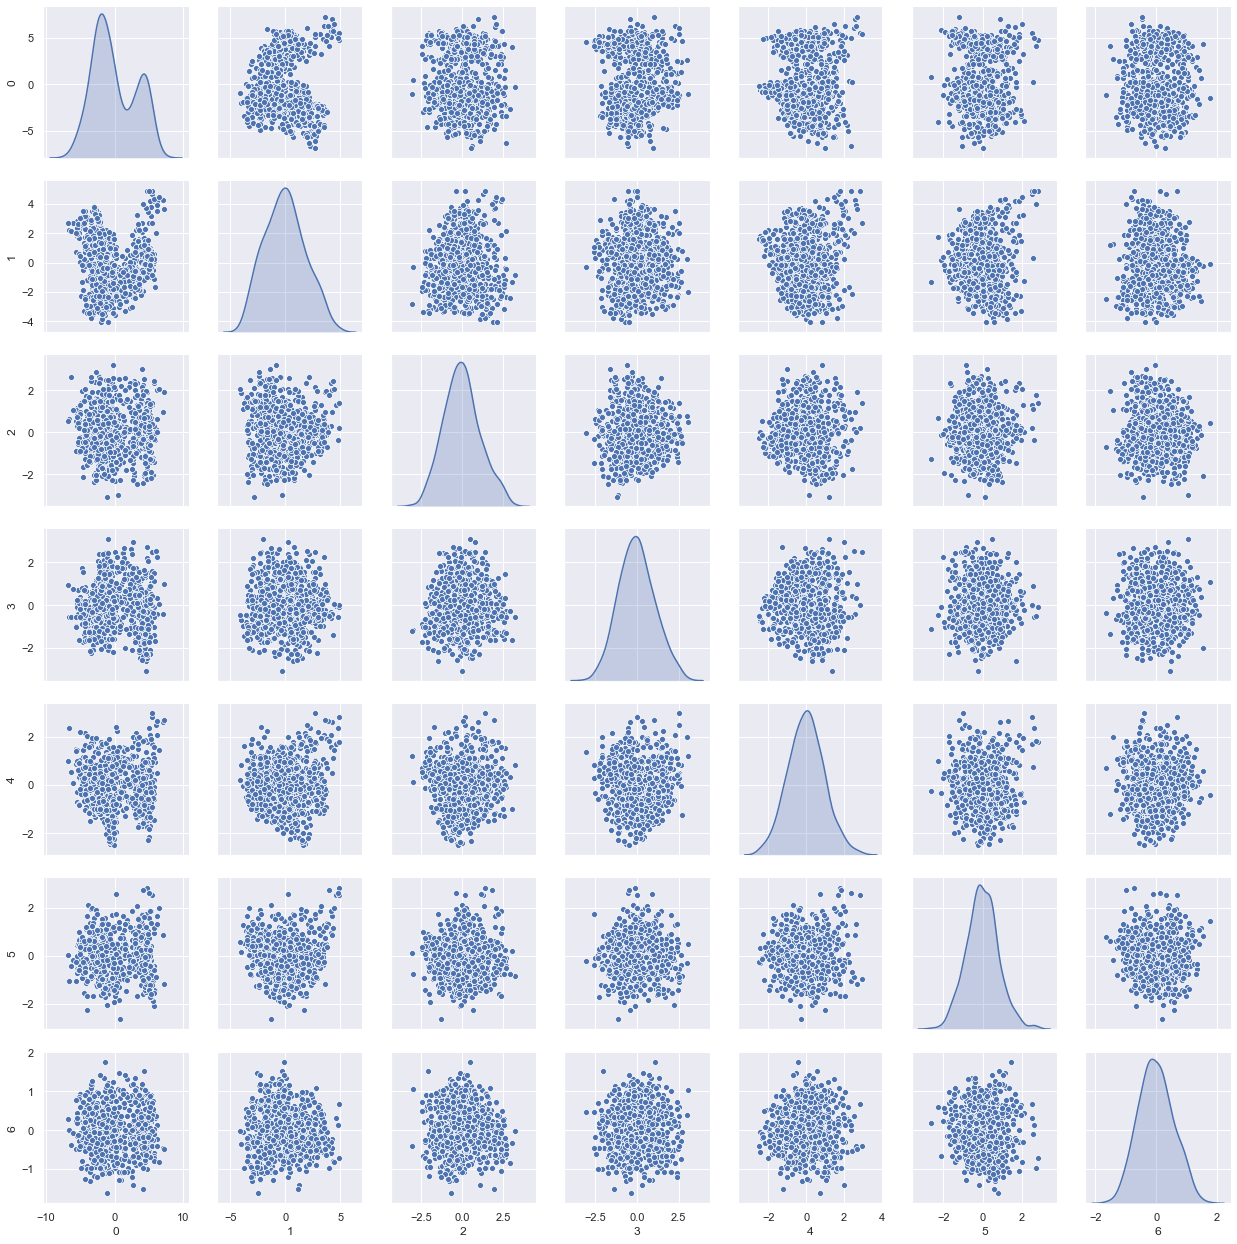

In [49]:
pca = pd.DataFrame(pcadf)
sns.pairplot(pca, diag_kind='kde')

##### Observation: The Pair plot clearly indicates that there is no correlation between the columns as expected after PCA

#### Approach 2 - PCA Data

In [50]:
name = "Approach 2 - PCA Data"
model = SVC(kernel='linear', probability=True)
scoring = 'accuracy'
scr_a2_pca, scr_cv_a2_pca, scr_a2_hy_pca = ModelEvaluation(pca, y, name, model, SVCTuneHyperParams, scoring)

Training Data Shape: (569, 7)
Testing Data Shape: (244, 7)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
+-----------------------+-------------------------------------------------------+
|        Metrics        |                        Results                        |
+-----------------------+-------------------------------------------------------+
| Classification Report |               precision    recall  f1-score   support |
|                       |                                                       |
|                       |          0.0       0.75      0.89      0.81        62 |
|                       |          1.0       0.94      0.80      0.87       125 |
|                       |          2.0       0.83      0.95      0.89        57 |
|                       |                

### Evaluate Performance of all Models

In [51]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model Name", "Accuracy Score", "Cross Validation Score", "Accuracy Score - Hyper Tuning"]
x.add_row(["A1: Approach 1 - Drop Features", scr_a1, scr_cv_a1, scr_a1_hy])
x.add_row(["A2: Approach 2 - Original Data", scr_a2, scr_cv_a2, scr_a2_hy])
x.add_row(["A2-PCA: Approach 2 - PCA Data", scr_a2_pca, scr_cv_a2_pca, scr_a2_hy_pca])
print(x)

+--------------------------------+--------------------+------------------------+-------------------------------+
|           Model Name           |   Accuracy Score   | Cross Validation Score | Accuracy Score - Hyper Tuning |
+--------------------------------+--------------------+------------------------+-------------------------------+
| A1: Approach 1 - Drop Features | 0.8688524590163934 |   0.8843721770551038   |       0.9508196721311475      |
| A2: Approach 2 - Original Data | 0.9385245901639344 |   0.9520174646190906   |       0.9590163934426229      |
| A2-PCA: Approach 2 - PCA Data  | 0.8565573770491803 |   0.8498644986449865   |       0.9385245901639344      |
+--------------------------------+--------------------+------------------------+-------------------------------+


##### A1: Approach 1 - Drop Features :- In this case we have dropped the highly correlated columns from the dataset before Model Building
##### A2: Approach 2 - Original Data :-  In this case we are using the original dataset for Model Building
##### A2-PCA: Approach 2 - PCA Data :- In this case we performed Dimensionality Reduction by PCA and used the data for Model Building

### Conclusion

- According to the comparison table shown above A2 has performed the best. It has the highest accuracy score at almost 94%, cross validation score at 95% & accuracy score after hyper tuning the model at almost 96%.
- A1 has also performed fairly well considering we have dropped 8 correlated columns from the dataset. The accuracy score of almost 87% & cross validation score 88% are encouraging. The striking point is the accuracy score after hyper tuning which is very close to A2 ie. 95%. This indicates that if a well tuned model is selected then A1 can perform equally well despite loss of information.
- In A2-PCA model we were able to carry out dimensionality reduction successfully wherein we reduced the dataset from 18 to just 7 columns. The model has performed well with expected drop in accuracy but it also gives us many benefits like improved performance & efficiency, decrease requirement of memory, capacity & computation time and most important one is non collinearity of data which reduces overfitting & improves visualization.
- A2-PCA model has good accuracy score at almost 86% & Cross validation score at 85%. This model also jumped in accuracy after hyper tuning similar to A1. The accuracy improved to almost 94%. Here too appropriate model selection could make a difference.
- Overall A2-PCA model has delivered good results along with the noteworthy advantages that it bring to the table. 